# Background Analysis for Hopping

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

COLORMAP = {
    "red" : "#AF272F",
    "orange" : "#BE531C",
    "green" : "#719949",
    "blue" : "#00558C",
    "purple" : "#642F6C",
}

colormap = {
    "red" : "#E06C75",
    "green" : "#98C379",
    "yellow" : "#E5C07B",
    "blue" : "#61AFEF",
    "purple" : "#C678DD",
    "mint" : "#56B6C2",
    "grey" : "#ABB2BF"
}

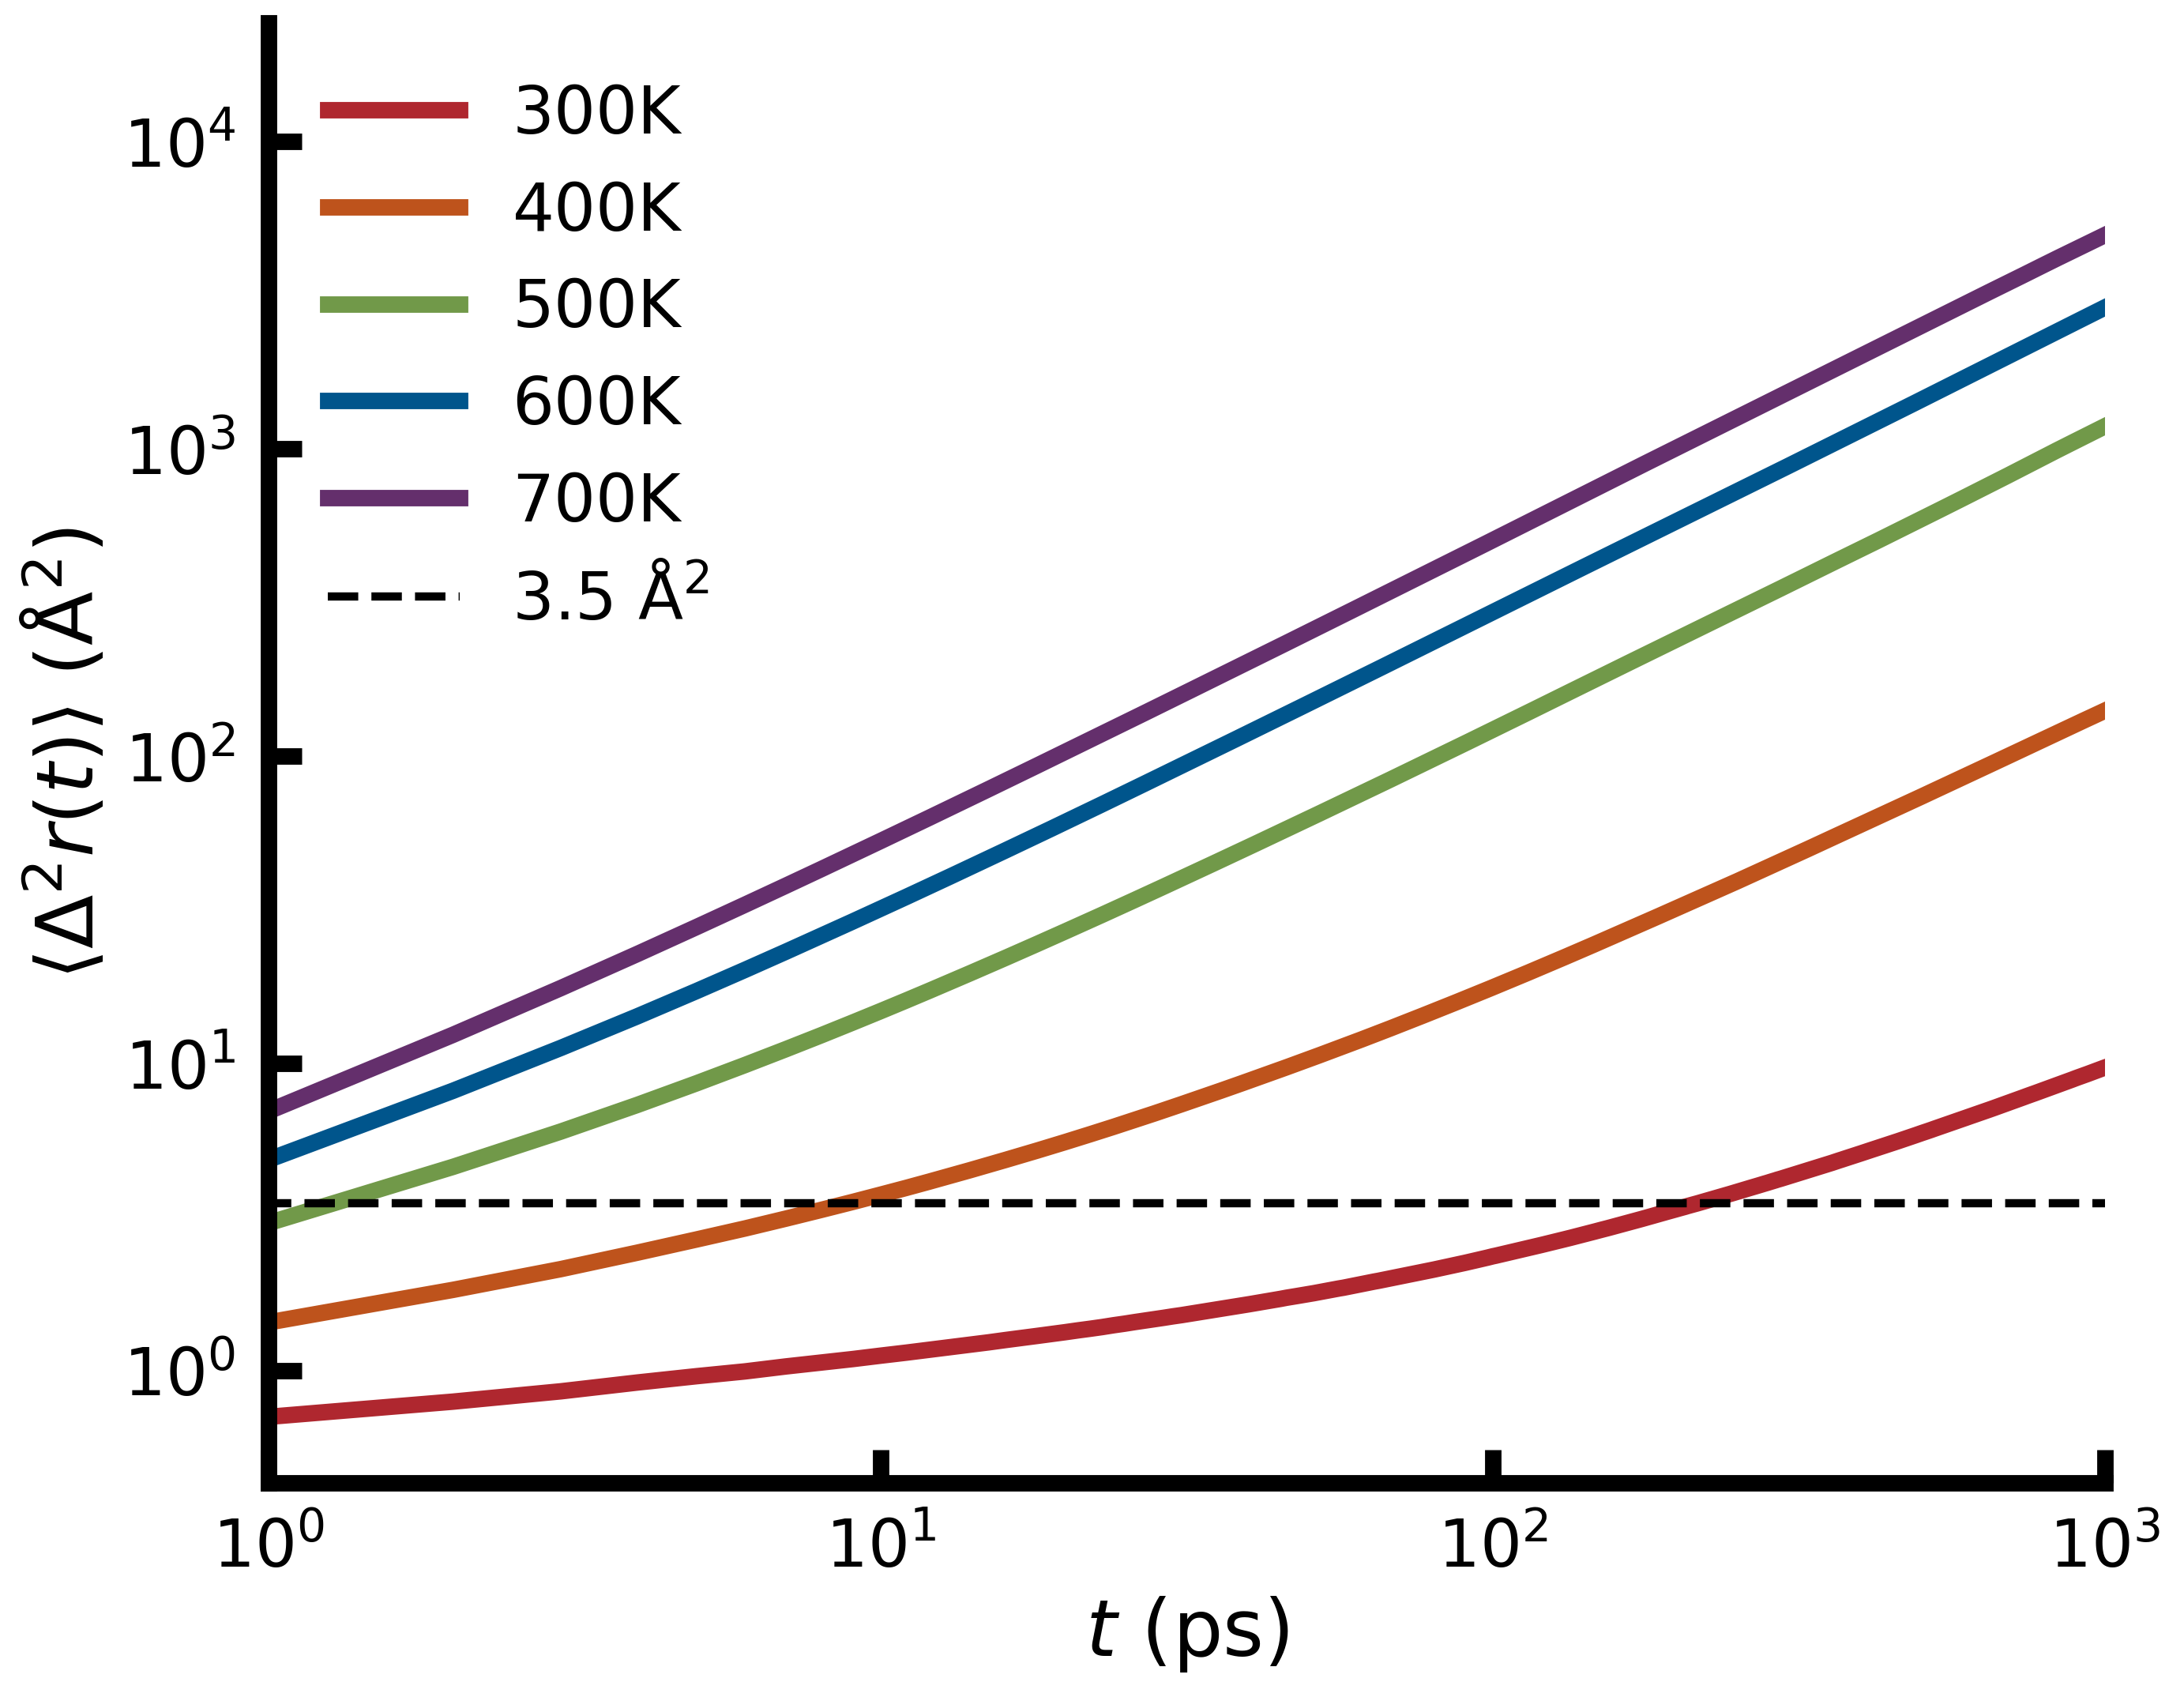

In [10]:
# MSD

params = {
    "linewidth" : 5,
    "axeswidth" : 5,
    "tick_labelsize" : 20,
    "axes_labelsize" : 24,
    "tick_padding" : 10,
}

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(params['axeswidth'])
ax.spines['bottom'].set_linewidth(params['axeswidth'])
ax.tick_params(labelsize = params['tick_labelsize'], pad = params['tick_padding'], length = params['axeswidth'] * 2, width = params['axeswidth'], direction = 'in')

ax.set_xlabel("$t$ (ps)", fontsize = params['axes_labelsize'])
ax.set_ylabel(r"$\langle \Delta^2 r(t) \rangle$ (Å$^2$)", fontsize = params['axes_labelsize'])

ROOT = "/mnt/CALC_SSD/bgkang/hopping_analysis/trajectories/"
for idx, t in enumerate(["300K", "400K", "500K", "600K", "700K"]):
    data = []
    for e in "00", "01", "02", "03":
        data.append(np.genfromtxt(f"{ROOT}/temperature/{t}/ensemble{e}/msd.out"))
    avg = np.stack(data).mean(axis = 0)
    std = np.stack(data).std(axis = 0)

    ax.plot(avg[:,0], avg[:,2], linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[idx]], label = t)

ax.hlines(3.5, 0, 1E3, linewidth = params['linewidth'] * 0.5, color = 'k', linestyle = '--', label = '3.5 Å$^2$')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1, 1E3)

ax.legend(fontsize = params['tick_labelsize'], frameon = False)

plt.savefig("msd_temperature.png", dpi = 300, bbox_inches = 'tight')
plt.show()

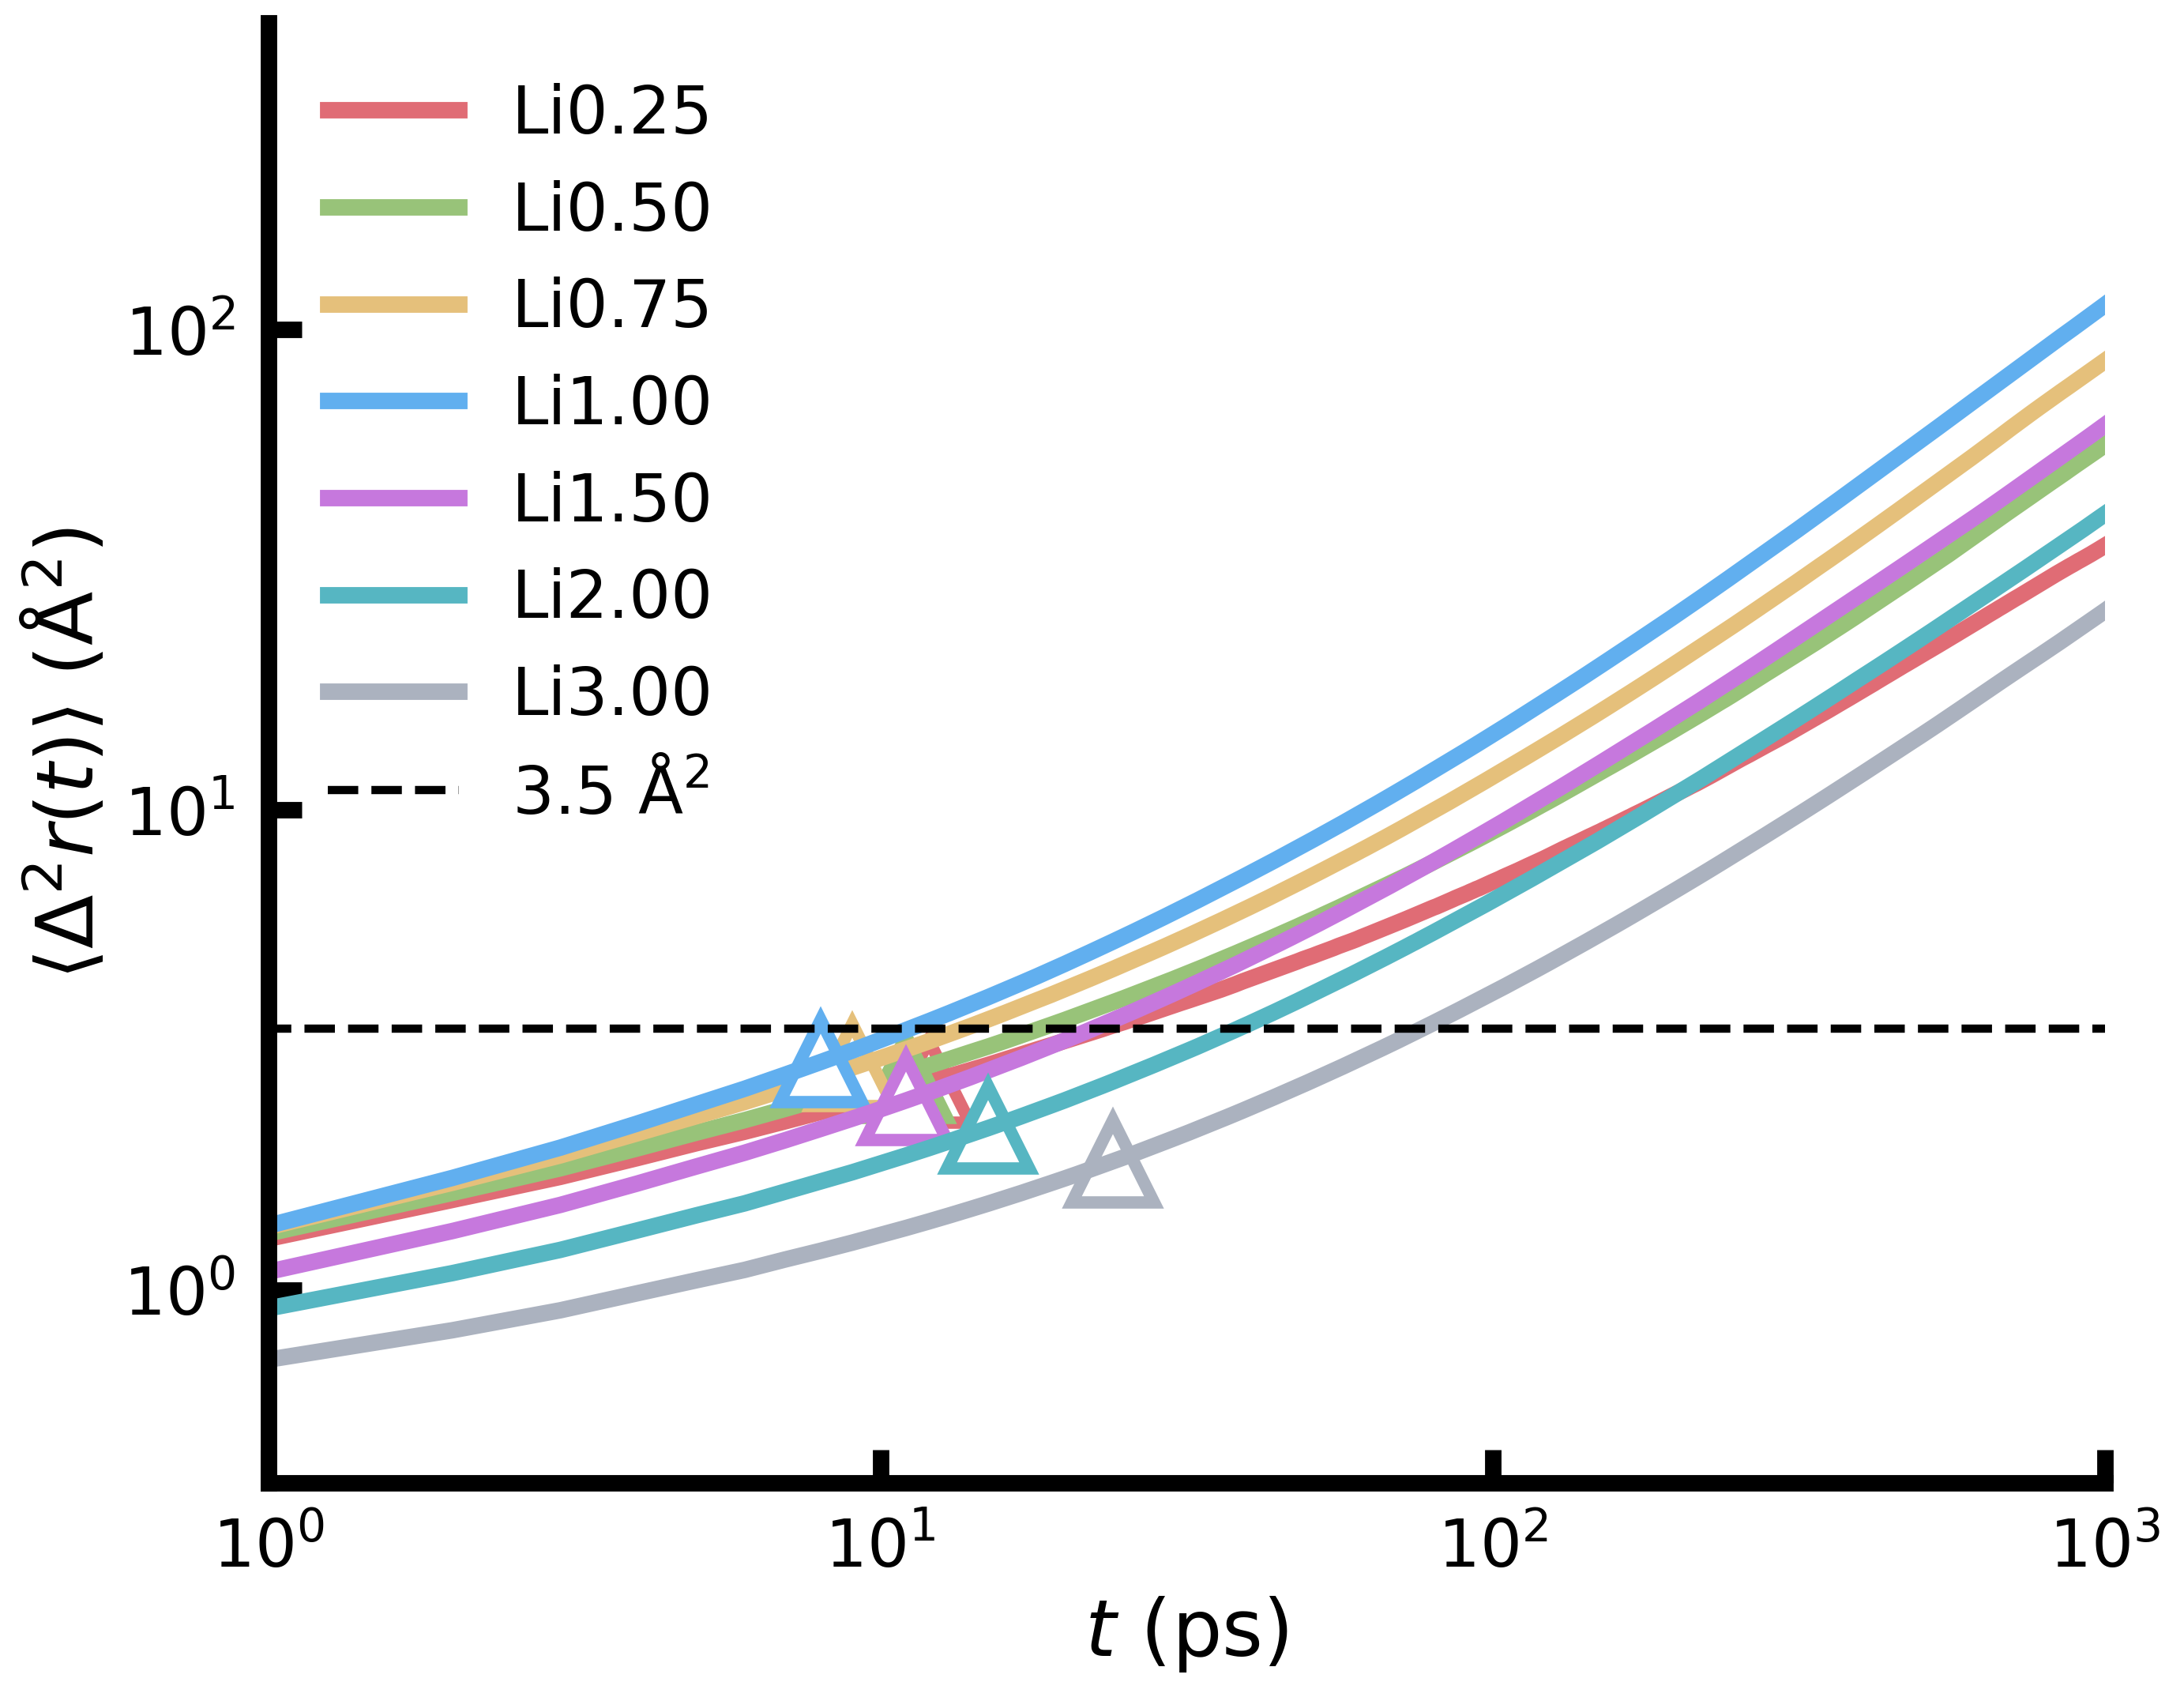

In [11]:
# MSD

params = {
    "linewidth" : 5,
    "axeswidth" : 5,
    "tick_labelsize" : 20,
    "axes_labelsize" : 24,
    "tick_padding" : 10,
    "markersize" : 25
}

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(params['axeswidth'])
ax.spines['bottom'].set_linewidth(params['axeswidth'])
ax.tick_params(labelsize = params['tick_labelsize'], pad = params['tick_padding'], length = params['axeswidth'] * 2, width = params['axeswidth'], direction = 'in')

ax.set_xlabel("$t$ (ps)", fontsize = params['axes_labelsize'])
ax.set_ylabel(r"$\langle \Delta^2 r(t) \rangle$ (Å$^2$)", fontsize = params['axes_labelsize'])

H_STAR = {
    "Li0.25": 2.715215215215215, 
    "Li0.50": 2.78028028028028, 
    "Li0.75": 2.9404404404404403, 
    "Li1.00": 3.0005005005005003, 
    "Li1.50": 2.5, 
    "Li2.00": 2.17967967967968, 
    "Li3.00": 1.8543543543543544
}

ROOT = "/mnt/CALC_SSD/bgkang/hopping_analysis/trajectories/"
for idx, t in enumerate(["Li0.25", "Li0.50", "Li0.75", "Li1.00", "Li1.50", "Li2.00", "Li3.00"]):
    data = []
    for e in "00", "01", "02", "03":
        data.append(np.genfromtxt(f"{ROOT}/composition/{t}/ensemble{e}/msd.out"))
    avg = np.stack(data).mean(axis = 0)
    std = np.stack(data).std(axis = 0)

    x = avg[np.abs(avg[:, 2] - H_STAR[t]).argmin()][0]
    ax.plot(x, H_STAR[t], marker = '^', markersize = params['markersize'], color = colormap[list(colormap.keys())[idx]], markerfacecolor = '#FFFFFF', markeredgewidth = params['linewidth'] * 0.75)

    ax.plot(avg[:,0], avg[:,2], linewidth = params['linewidth'], color = colormap[list(colormap.keys())[idx]], label = t)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1, 1E3)

ax.hlines(3.5, 0, 1E3, linewidth = params['linewidth'] * 0.5, color = 'k', linestyle = '--', label = '3.5 Å$^2$')
ax.legend(fontsize = params['tick_labelsize'], frameon = False)

plt.savefig("msd_composition.png", dpi = 300, bbox_inches = 'tight')
plt.show()

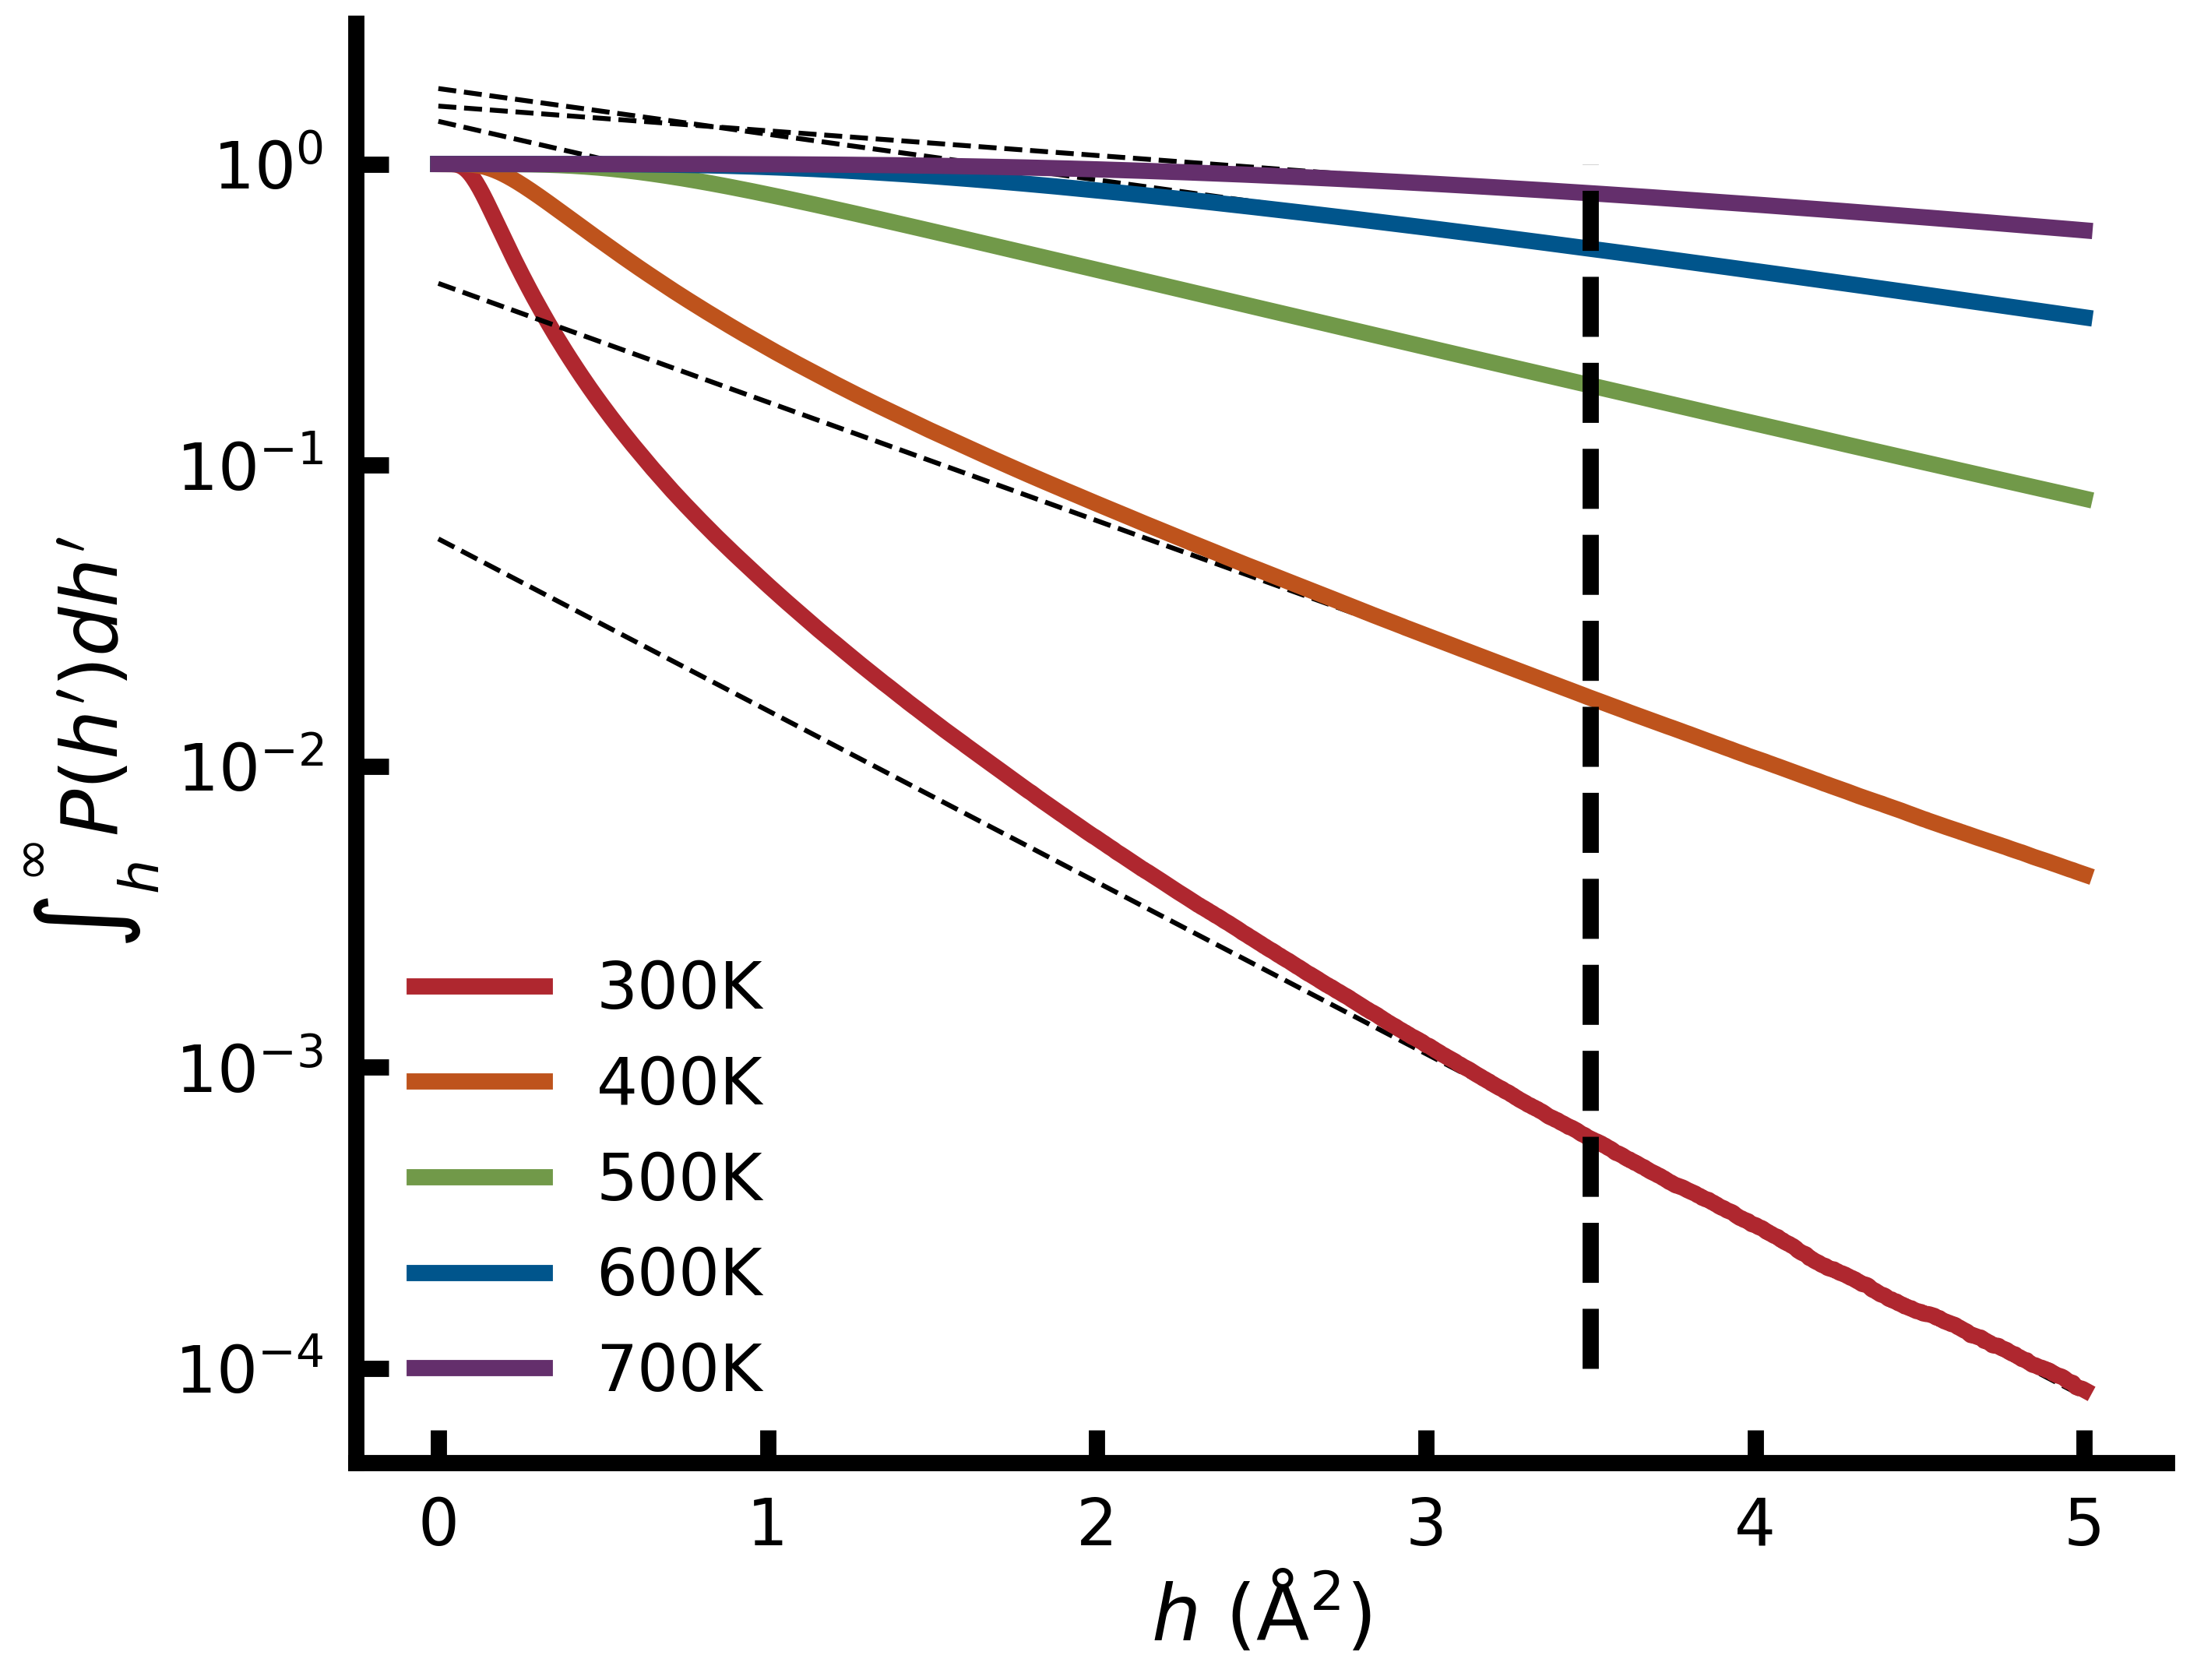

In [12]:
# Cumulative Probabilities

params = {
    "linewidth" : 5,
    "axeswidth" : 5,
    "tick_labelsize" : 20,
    "axes_labelsize" : 24,
    "tick_padding" : 10,
}

H_STAR = 3.5

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(params['axeswidth'])
ax.spines['bottom'].set_linewidth(params['axeswidth'])
ax.tick_params(labelsize = params['tick_labelsize'], pad = params['tick_padding'], length = params['axeswidth'] * 2, width = params['axeswidth'], direction = 'in')

ax.set_xlabel("$h$ (Å$^2$)", fontsize = params['axes_labelsize'])
ax.set_ylabel(r"$\int^{\infty}_h P(h') dh'$", fontsize = params['axes_labelsize'])

ROOT = "/mnt/CALC_SSD/bgkang/hopping_analysis/trajectories/"
def exponential(x, a, b): return a * np.exp(b * x)
for idx, t in enumerate(["300K", "400K", "500K", "600K", "700K"]):
    data = []
    for e in "00", "01", "02", "03":
        data.append(np.genfromtxt(f"{ROOT}/temperature/{t}/ensemble{e}/hop.out")[:,1:])
    data = np.stack(data).flatten()

    hs = np.linspace(0, 5, 1000)
    result = np.array([((data > h).sum() / data.shape[0]) for h in hs])
    popt, pcov = curve_fit(exponential, hs[hs > H_STAR], result[hs > H_STAR])

    ax.plot(hs, exponential(hs, *popt), linewidth = params['linewidth'] * 0.3, color = 'k', linestyle = '--')
    ax.plot(hs, result, linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[idx]], label = t)

ax.set_yscale('log')

ax.vlines(H_STAR, 1E-4, 1E0, color = 'k', linewidth = params['linewidth'], linestyle = '--')

ax.legend(fontsize = params['tick_labelsize'], frameon = False)

plt.savefig("cum_prob_temperature.png", dpi = 300, bbox_inches = 'tight')
plt.show()

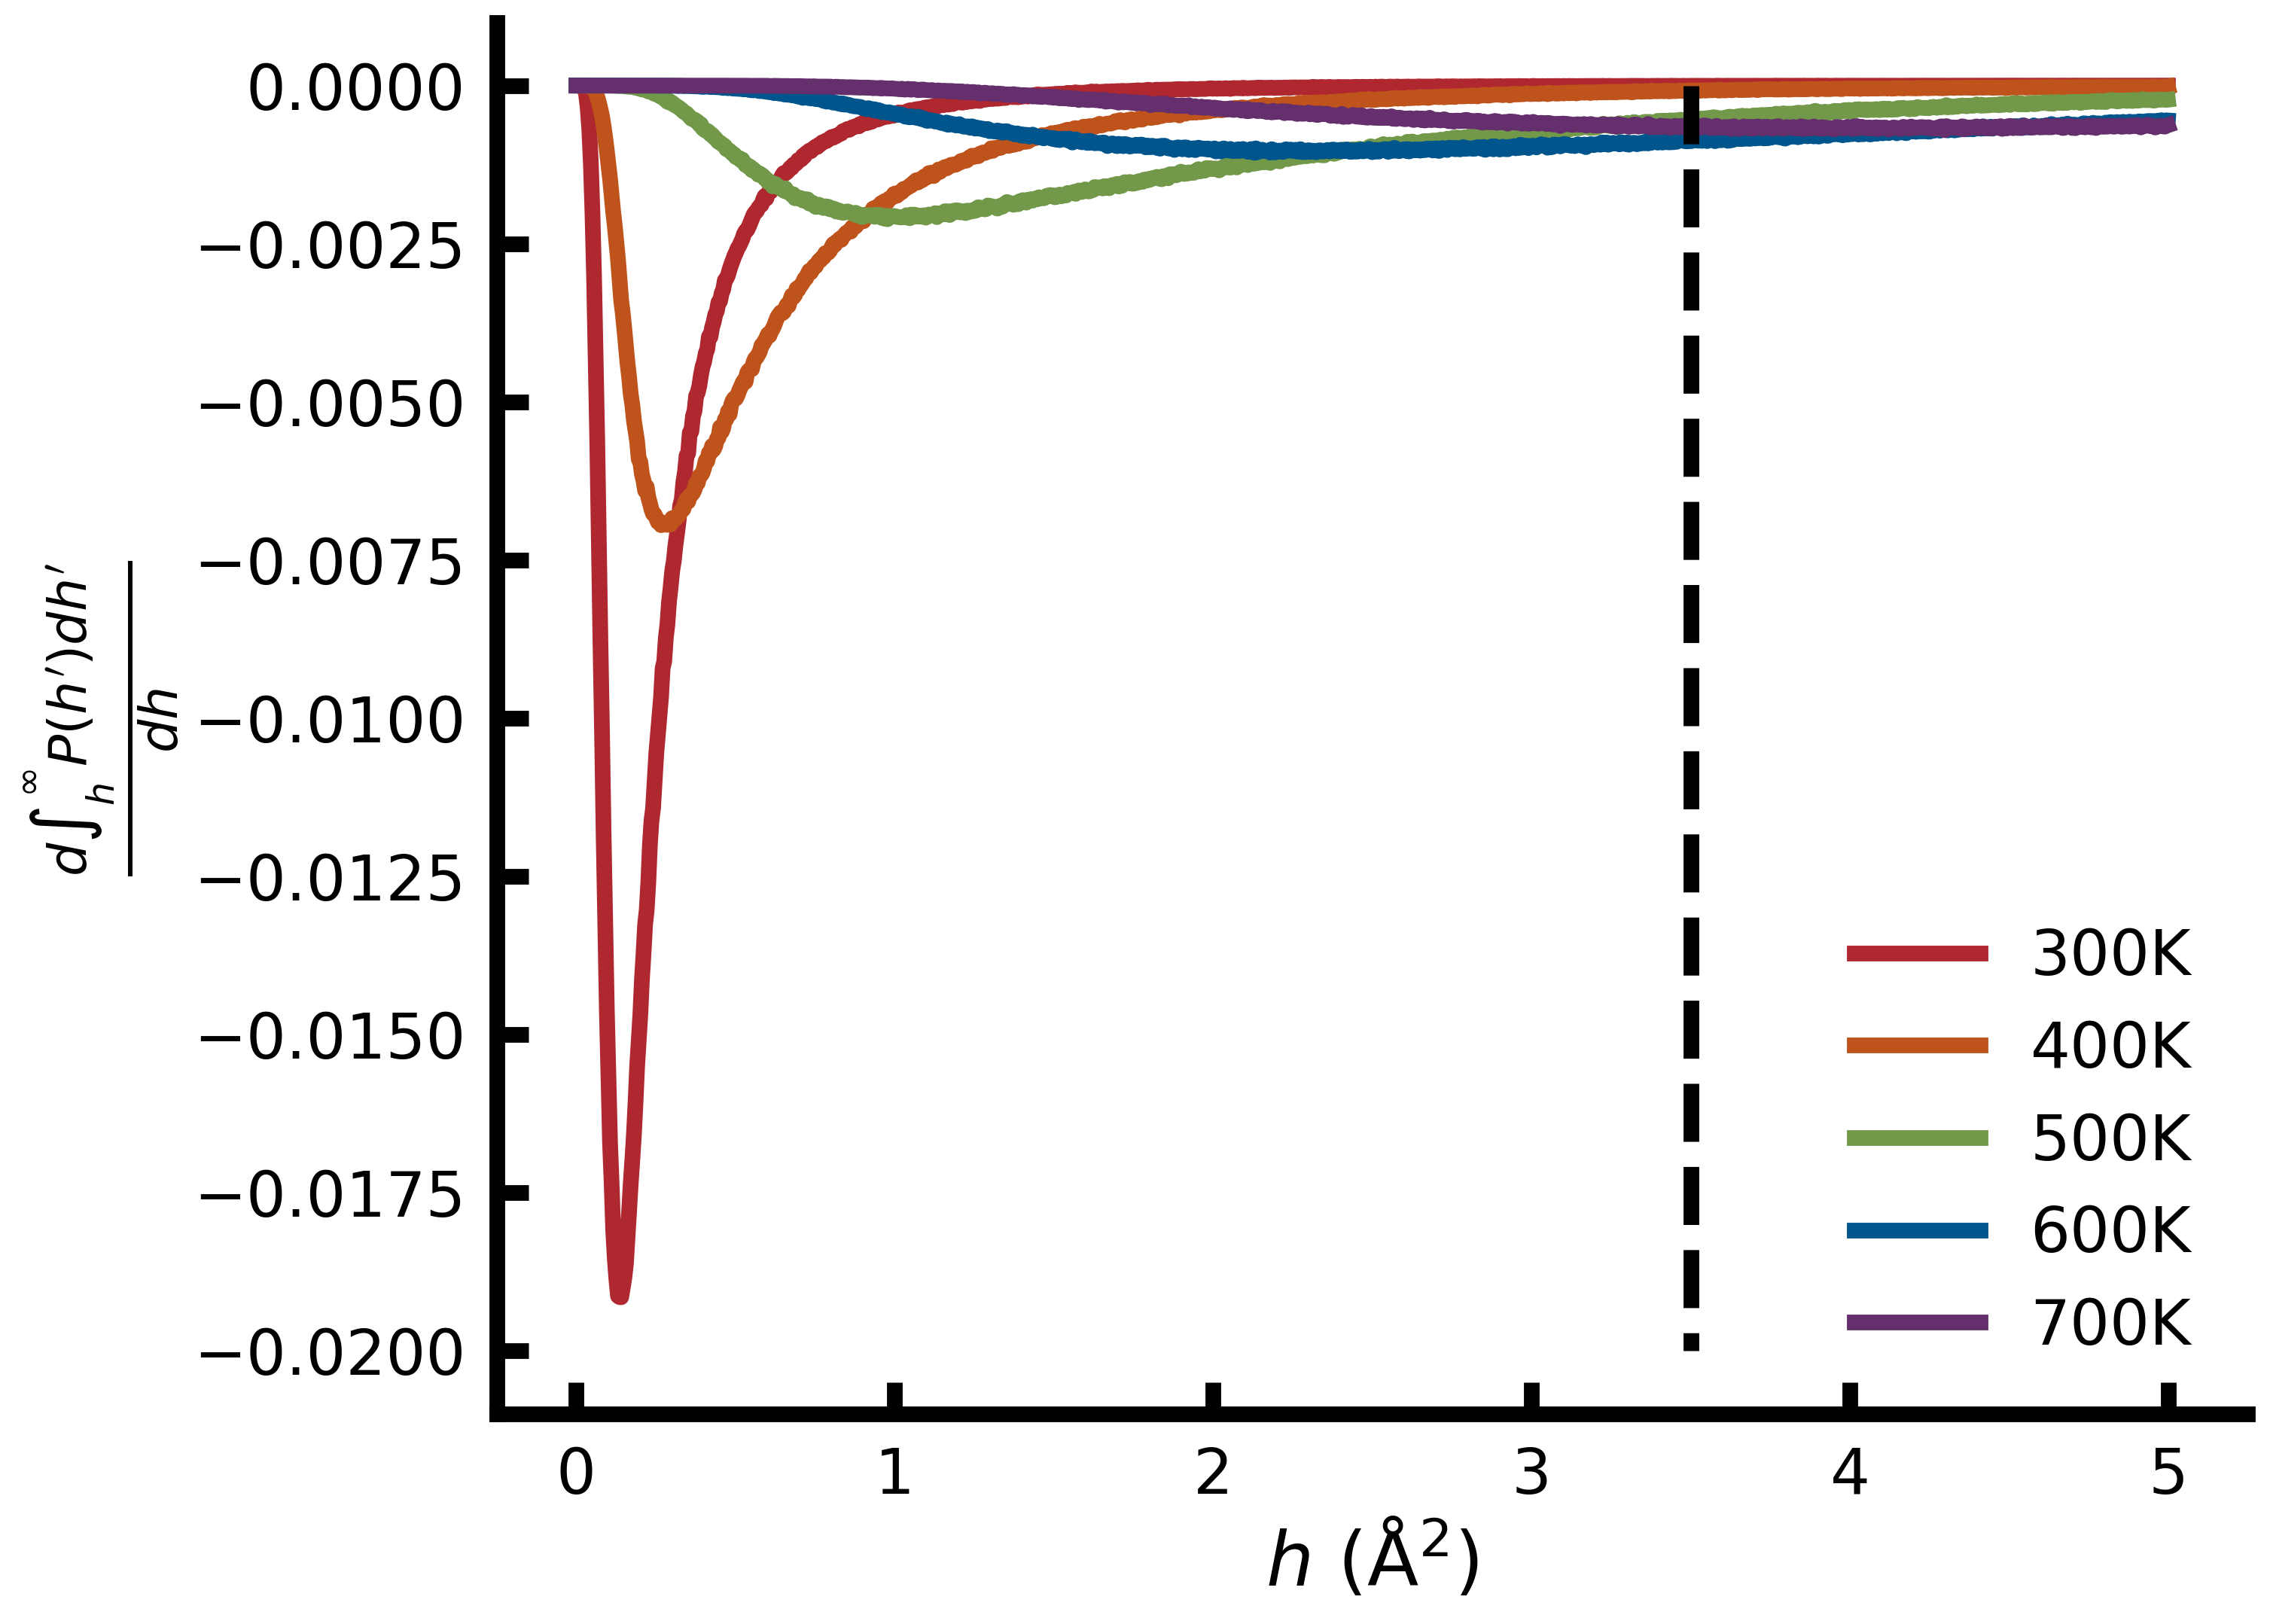

In [13]:
# Cumulative Probabilities

params = {
    "linewidth" : 5,
    "axeswidth" : 5,
    "tick_labelsize" : 20,
    "axes_labelsize" : 24,
    "tick_padding" : 10,
}

H_STAR = 3.5

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(params['axeswidth'])
ax.spines['bottom'].set_linewidth(params['axeswidth'])
ax.tick_params(labelsize = params['tick_labelsize'], pad = params['tick_padding'], length = params['axeswidth'] * 2, width = params['axeswidth'], direction = 'in')

ax.set_xlabel("$h$ (Å$^2$)", fontsize = params['axes_labelsize'])
ax.set_ylabel(r"$\frac{d \int^{\infty}_h P(h') dh'}{dh}$", fontsize = params['axes_labelsize'])

ROOT = "/mnt/CALC_SSD/bgkang/hopping_analysis/trajectories/"
def exponential(x, a, b): return a * np.exp(b * x)
for idx, t in enumerate(["300K", "400K", "500K", "600K", "700K"]):
    data = []
    for e in "00", "01", "02", "03":
        data.append(np.genfromtxt(f"{ROOT}/temperature/{t}/ensemble{e}/hop.out")[:,1:])
    data = np.stack(data).flatten()

    hs = np.linspace(0, 5, 1000)
    result = np.array([((data > h).sum() / data.shape[0]) for h in hs])
    delta = result[1:] - result[:-1]

    ax.plot((hs[1:] + hs[:-1]) / 2, delta, linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[idx]], label = t)

ax.vlines(H_STAR, 0, -0.02, color = 'k', linewidth = params['linewidth'], linestyle = '--')

ax.legend(fontsize = params['tick_labelsize'], frameon = False)

plt.savefig("prob_temperature.png", dpi = 300, bbox_inches = 'tight')
plt.show()

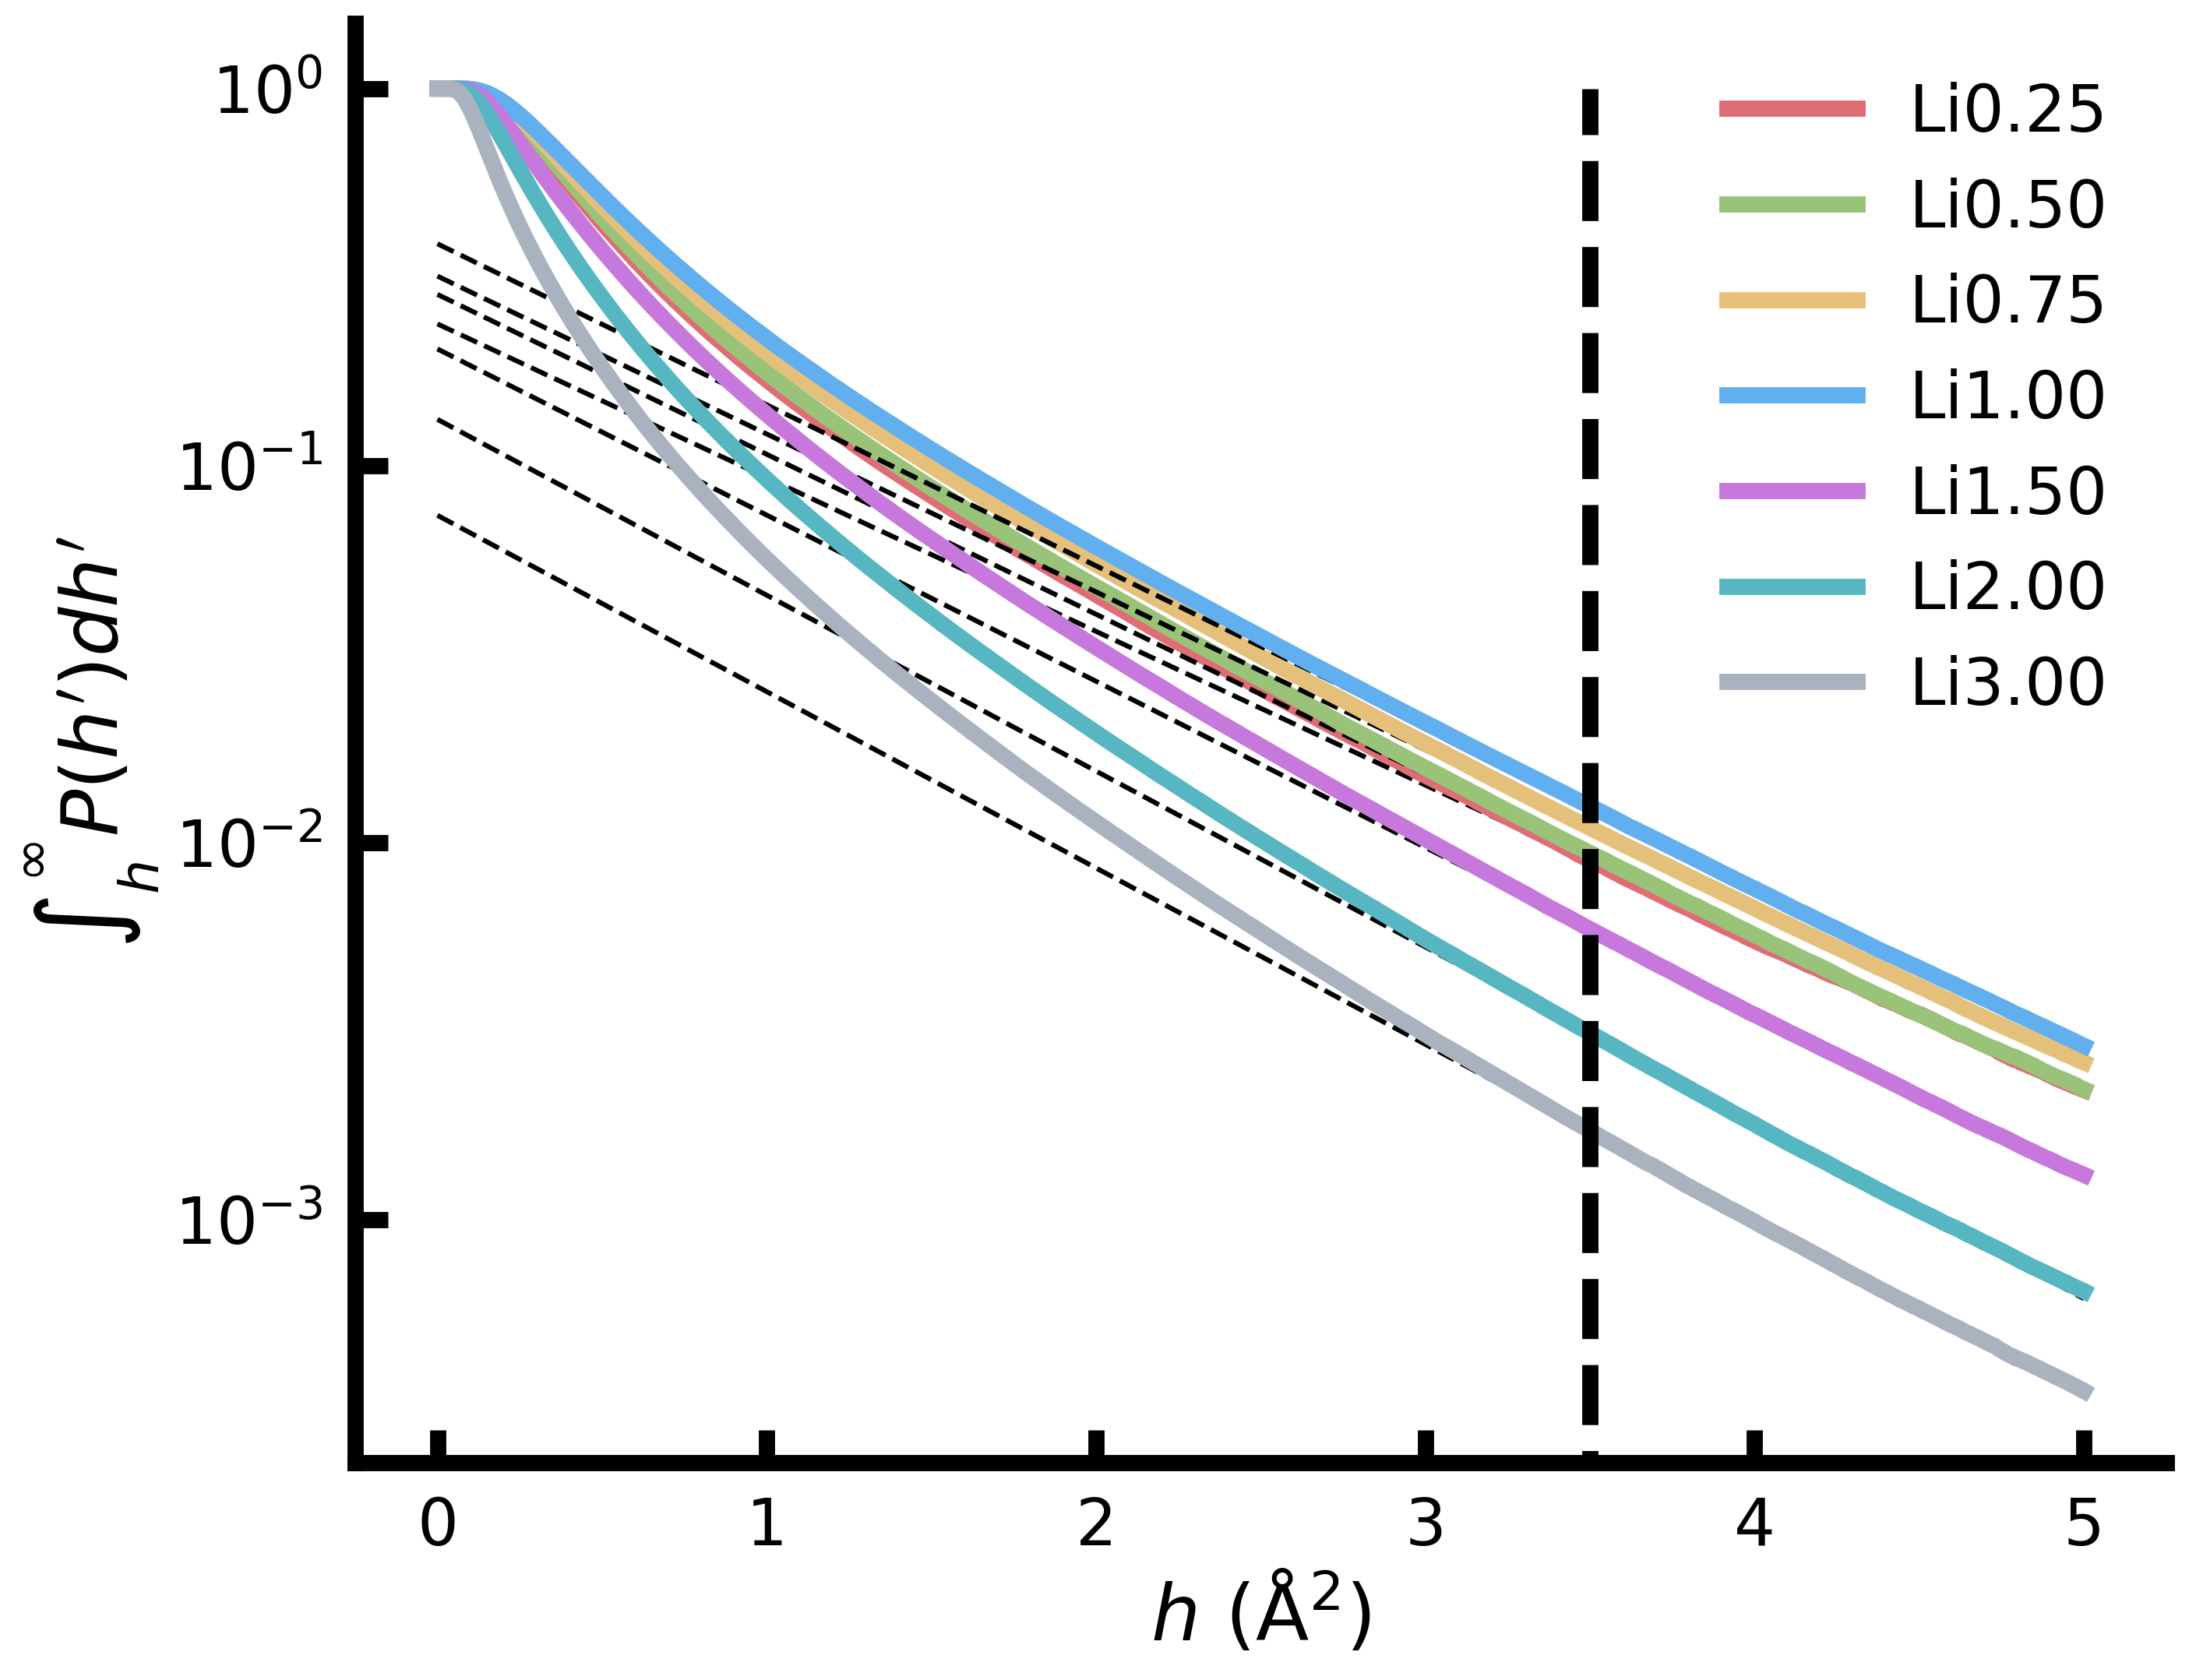

In [14]:
# Cumulative Probabilities

params = {
    "linewidth" : 5,
    "axeswidth" : 5,
    "tick_labelsize" : 20,
    "axes_labelsize" : 24,
    "tick_padding" : 10,
}

H_STAR = 3.5

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(params['axeswidth'])
ax.spines['bottom'].set_linewidth(params['axeswidth'])
ax.tick_params(labelsize = params['tick_labelsize'], pad = params['tick_padding'], length = params['axeswidth'] * 2, width = params['axeswidth'], direction = 'in')

ax.set_xlabel("$h$ (Å$^2$)", fontsize = params['axes_labelsize'])
ax.set_ylabel(r"$\int^{\infty}_h P(h') dh'$", fontsize = params['axes_labelsize'])

ROOT = "/mnt/CALC_SSD/bgkang/hopping_analysis/trajectories/"
def exponential(x, a, b): return a * np.exp(b * x)
for idx, t in enumerate(["Li0.25", "Li0.50", "Li0.75", "Li1.00", "Li1.50", "Li2.00", "Li3.00"]):
    data = []
    for e in "00", "01", "02", "03":
        data.append(np.genfromtxt(f"{ROOT}/composition/{t}/ensemble{e}/hop.out")[:,1:])
    data = np.stack(data).flatten()

    hs = np.linspace(0, 5, 1000)
    result = np.array([((data > h).sum() / data.shape[0]) for h in hs])
    popt, pcov = curve_fit(exponential, hs[hs > H_STAR], result[hs > H_STAR])

    ax.plot(hs, exponential(hs, *popt), linewidth = params['linewidth'] * 0.3, color = 'k', linestyle = '--')
    ax.plot(hs, result, linewidth = params['linewidth'], color = colormap[list(colormap.keys())[idx]], label = t)

ax.set_yscale('log')

ax.vlines(H_STAR, 1E-4, 1E0, color = 'k', linewidth = params['linewidth'], linestyle = '--')

ax.legend(fontsize = params['tick_labelsize'], frameon = False)

plt.savefig("cum_prob_compsition.png", dpi = 300, bbox_inches = 'tight')
plt.show()

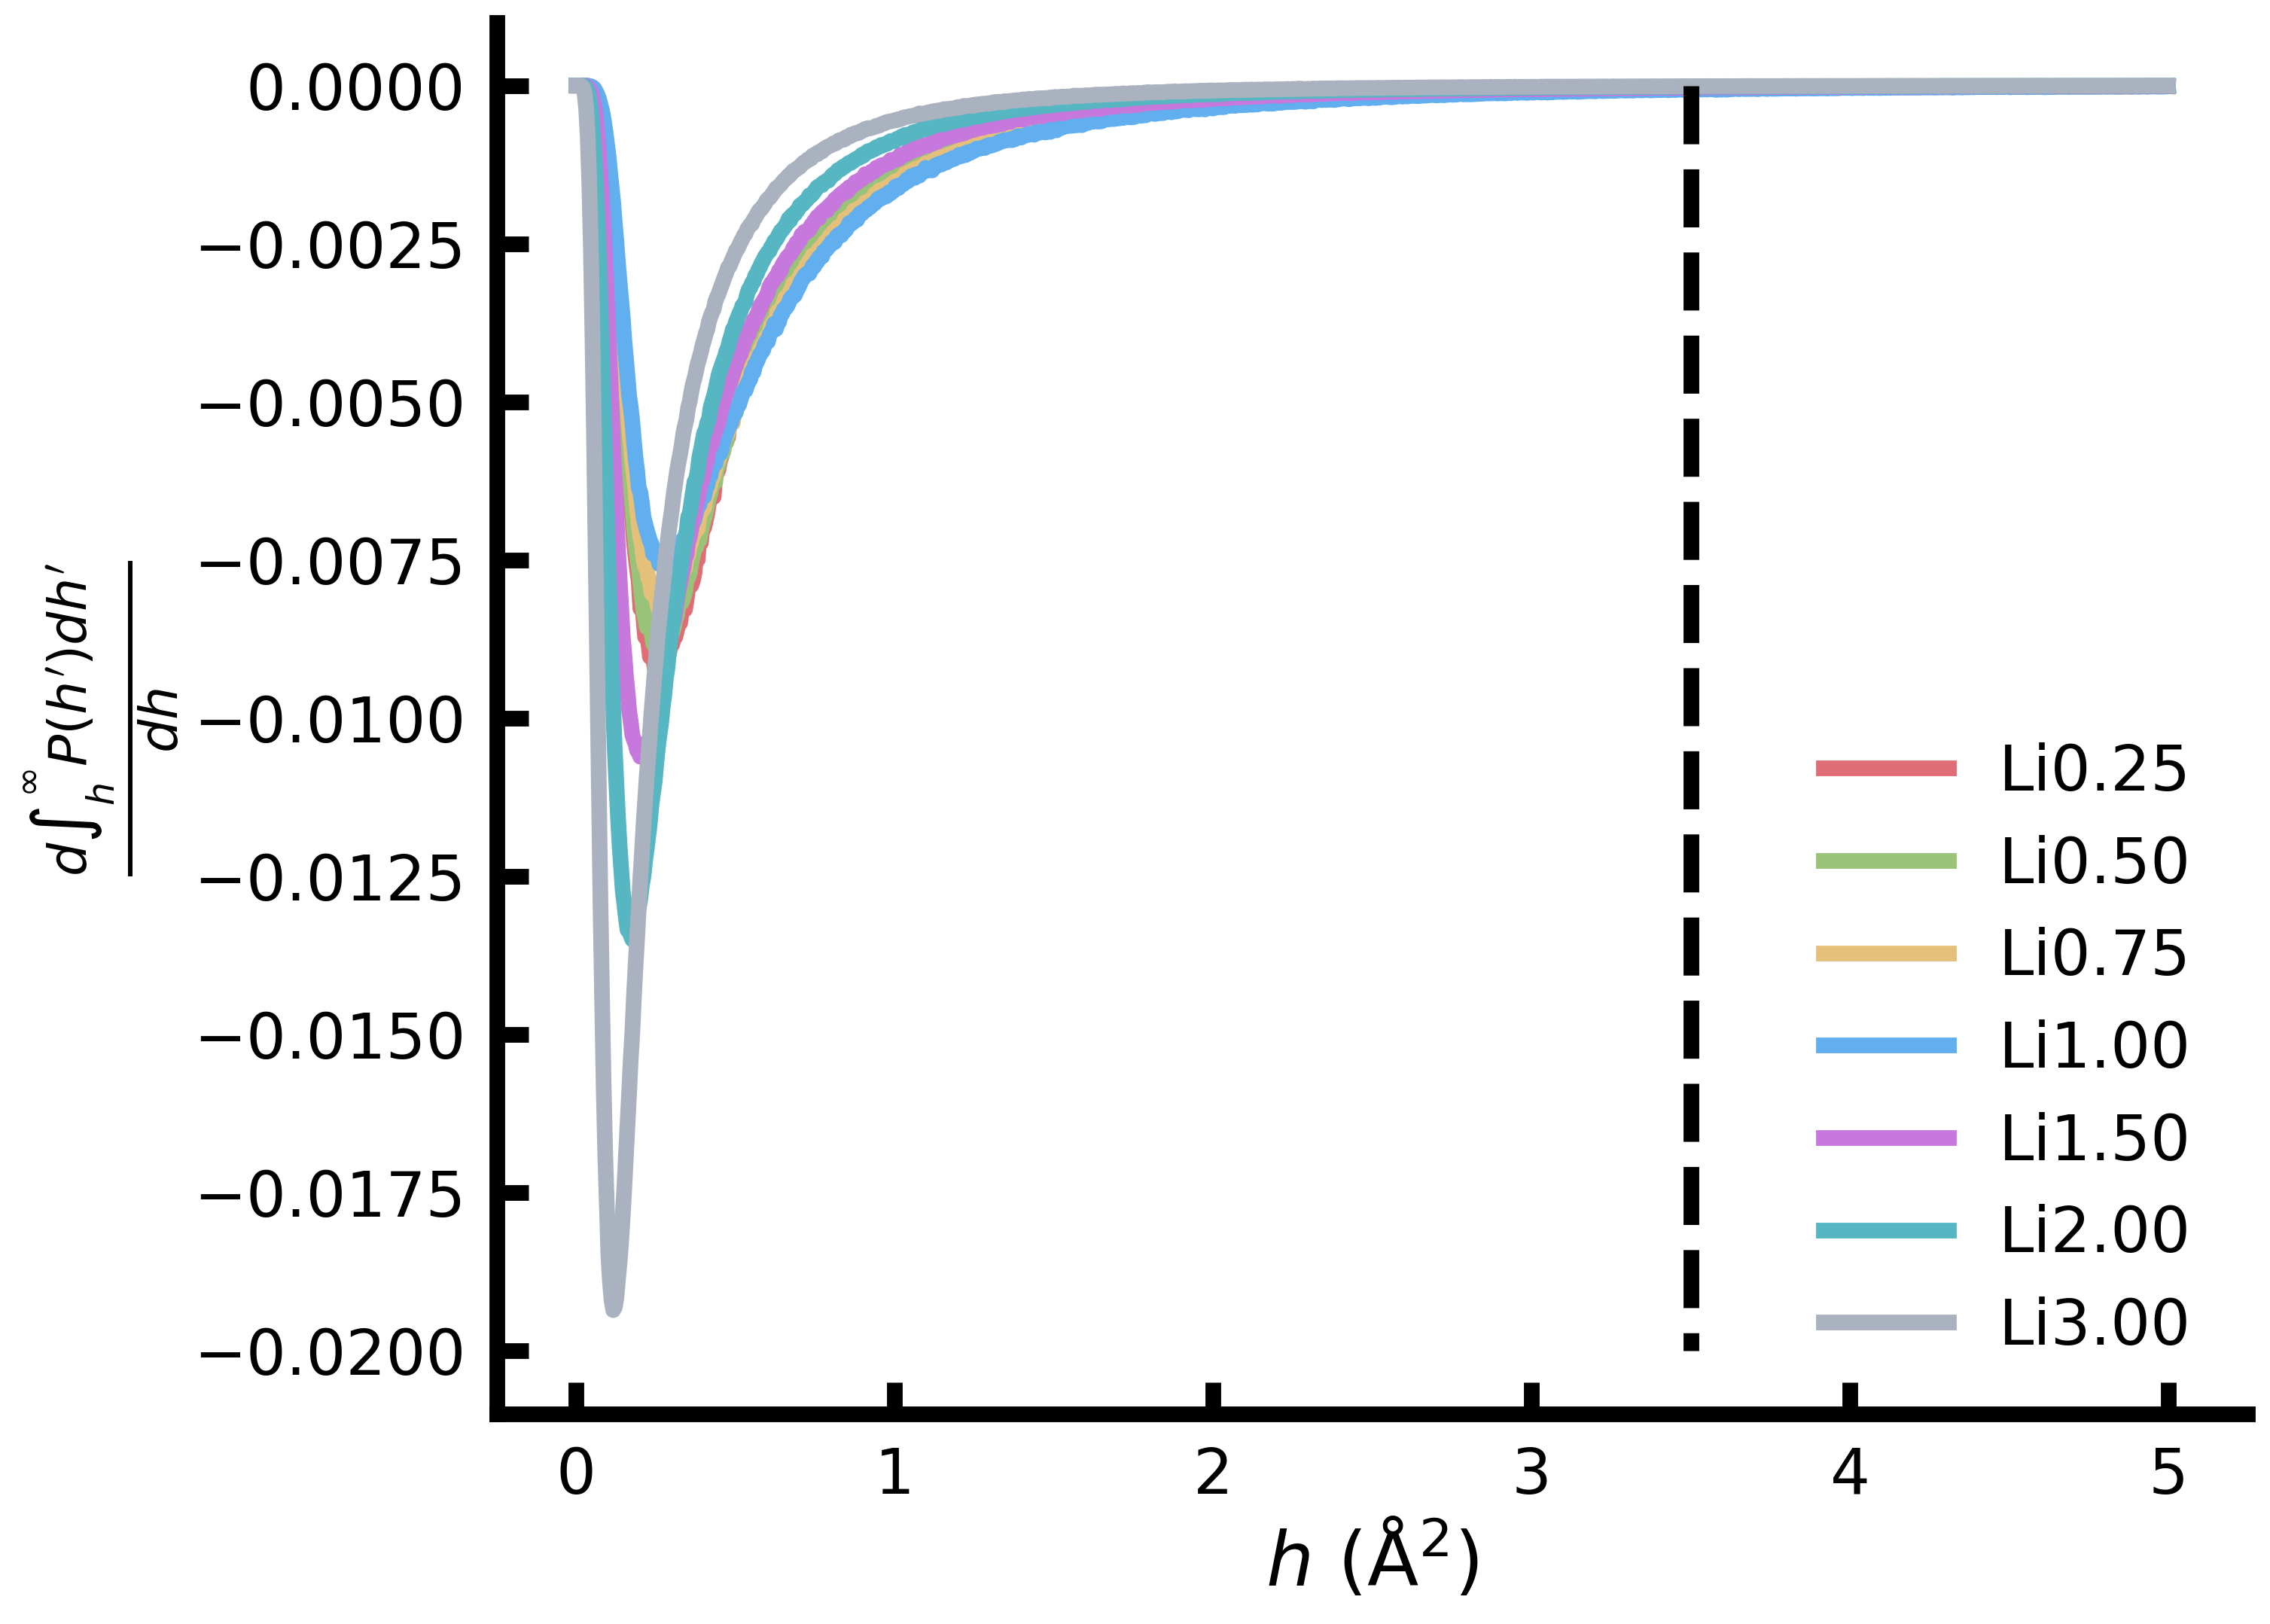

In [15]:
# Cumulative Probabilities

params = {
    "linewidth" : 5,
    "axeswidth" : 5,
    "tick_labelsize" : 20,
    "axes_labelsize" : 24,
    "tick_padding" : 10,
}

H_STAR = 3.5

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(params['axeswidth'])
ax.spines['bottom'].set_linewidth(params['axeswidth'])
ax.tick_params(labelsize = params['tick_labelsize'], pad = params['tick_padding'], length = params['axeswidth'] * 2, width = params['axeswidth'], direction = 'in')

ax.set_xlabel("$h$ (Å$^2$)", fontsize = params['axes_labelsize'])
ax.set_ylabel(r"$\frac{d \int^{\infty}_h P(h') dh'}{dh}$", fontsize = params['axes_labelsize'])

ROOT = "/mnt/CALC_SSD/bgkang/hopping_analysis/trajectories/"
def exponential(x, a, b): return a * np.exp(b * x)
for idx, t in enumerate(["Li0.25", "Li0.50", "Li0.75", "Li1.00", "Li1.50", "Li2.00", "Li3.00"]):
    data = []
    for e in "00", "01", "02", "03":
        data.append(np.genfromtxt(f"{ROOT}/composition/{t}/ensemble{e}/hop.out")[:,1:])
    data = np.stack(data).flatten()

    hs = np.linspace(0, 5, 1000)
    result = np.array([((data > h).sum() / data.shape[0]) for h in hs])
    delta = result[1:] - result[:-1]

    ax.plot((hs[1:] + hs[:-1]) / 2, delta, linewidth = params['linewidth'], color = colormap[list(colormap.keys())[idx]], label = t)

ax.legend(fontsize = params['tick_labelsize'], frameon = False)

ax.vlines(H_STAR, 0, -0.02, color = 'k', linewidth = params['linewidth'], linestyle = '--')

plt.savefig("prob_compsition.png", dpi = 300, bbox_inches = 'tight')
plt.show()

{300.0: 1.0035035035035036, 375.0: 1.2587587587587588, 400.0: 1.3038038038038038, 500.0: 2.45995995995996}


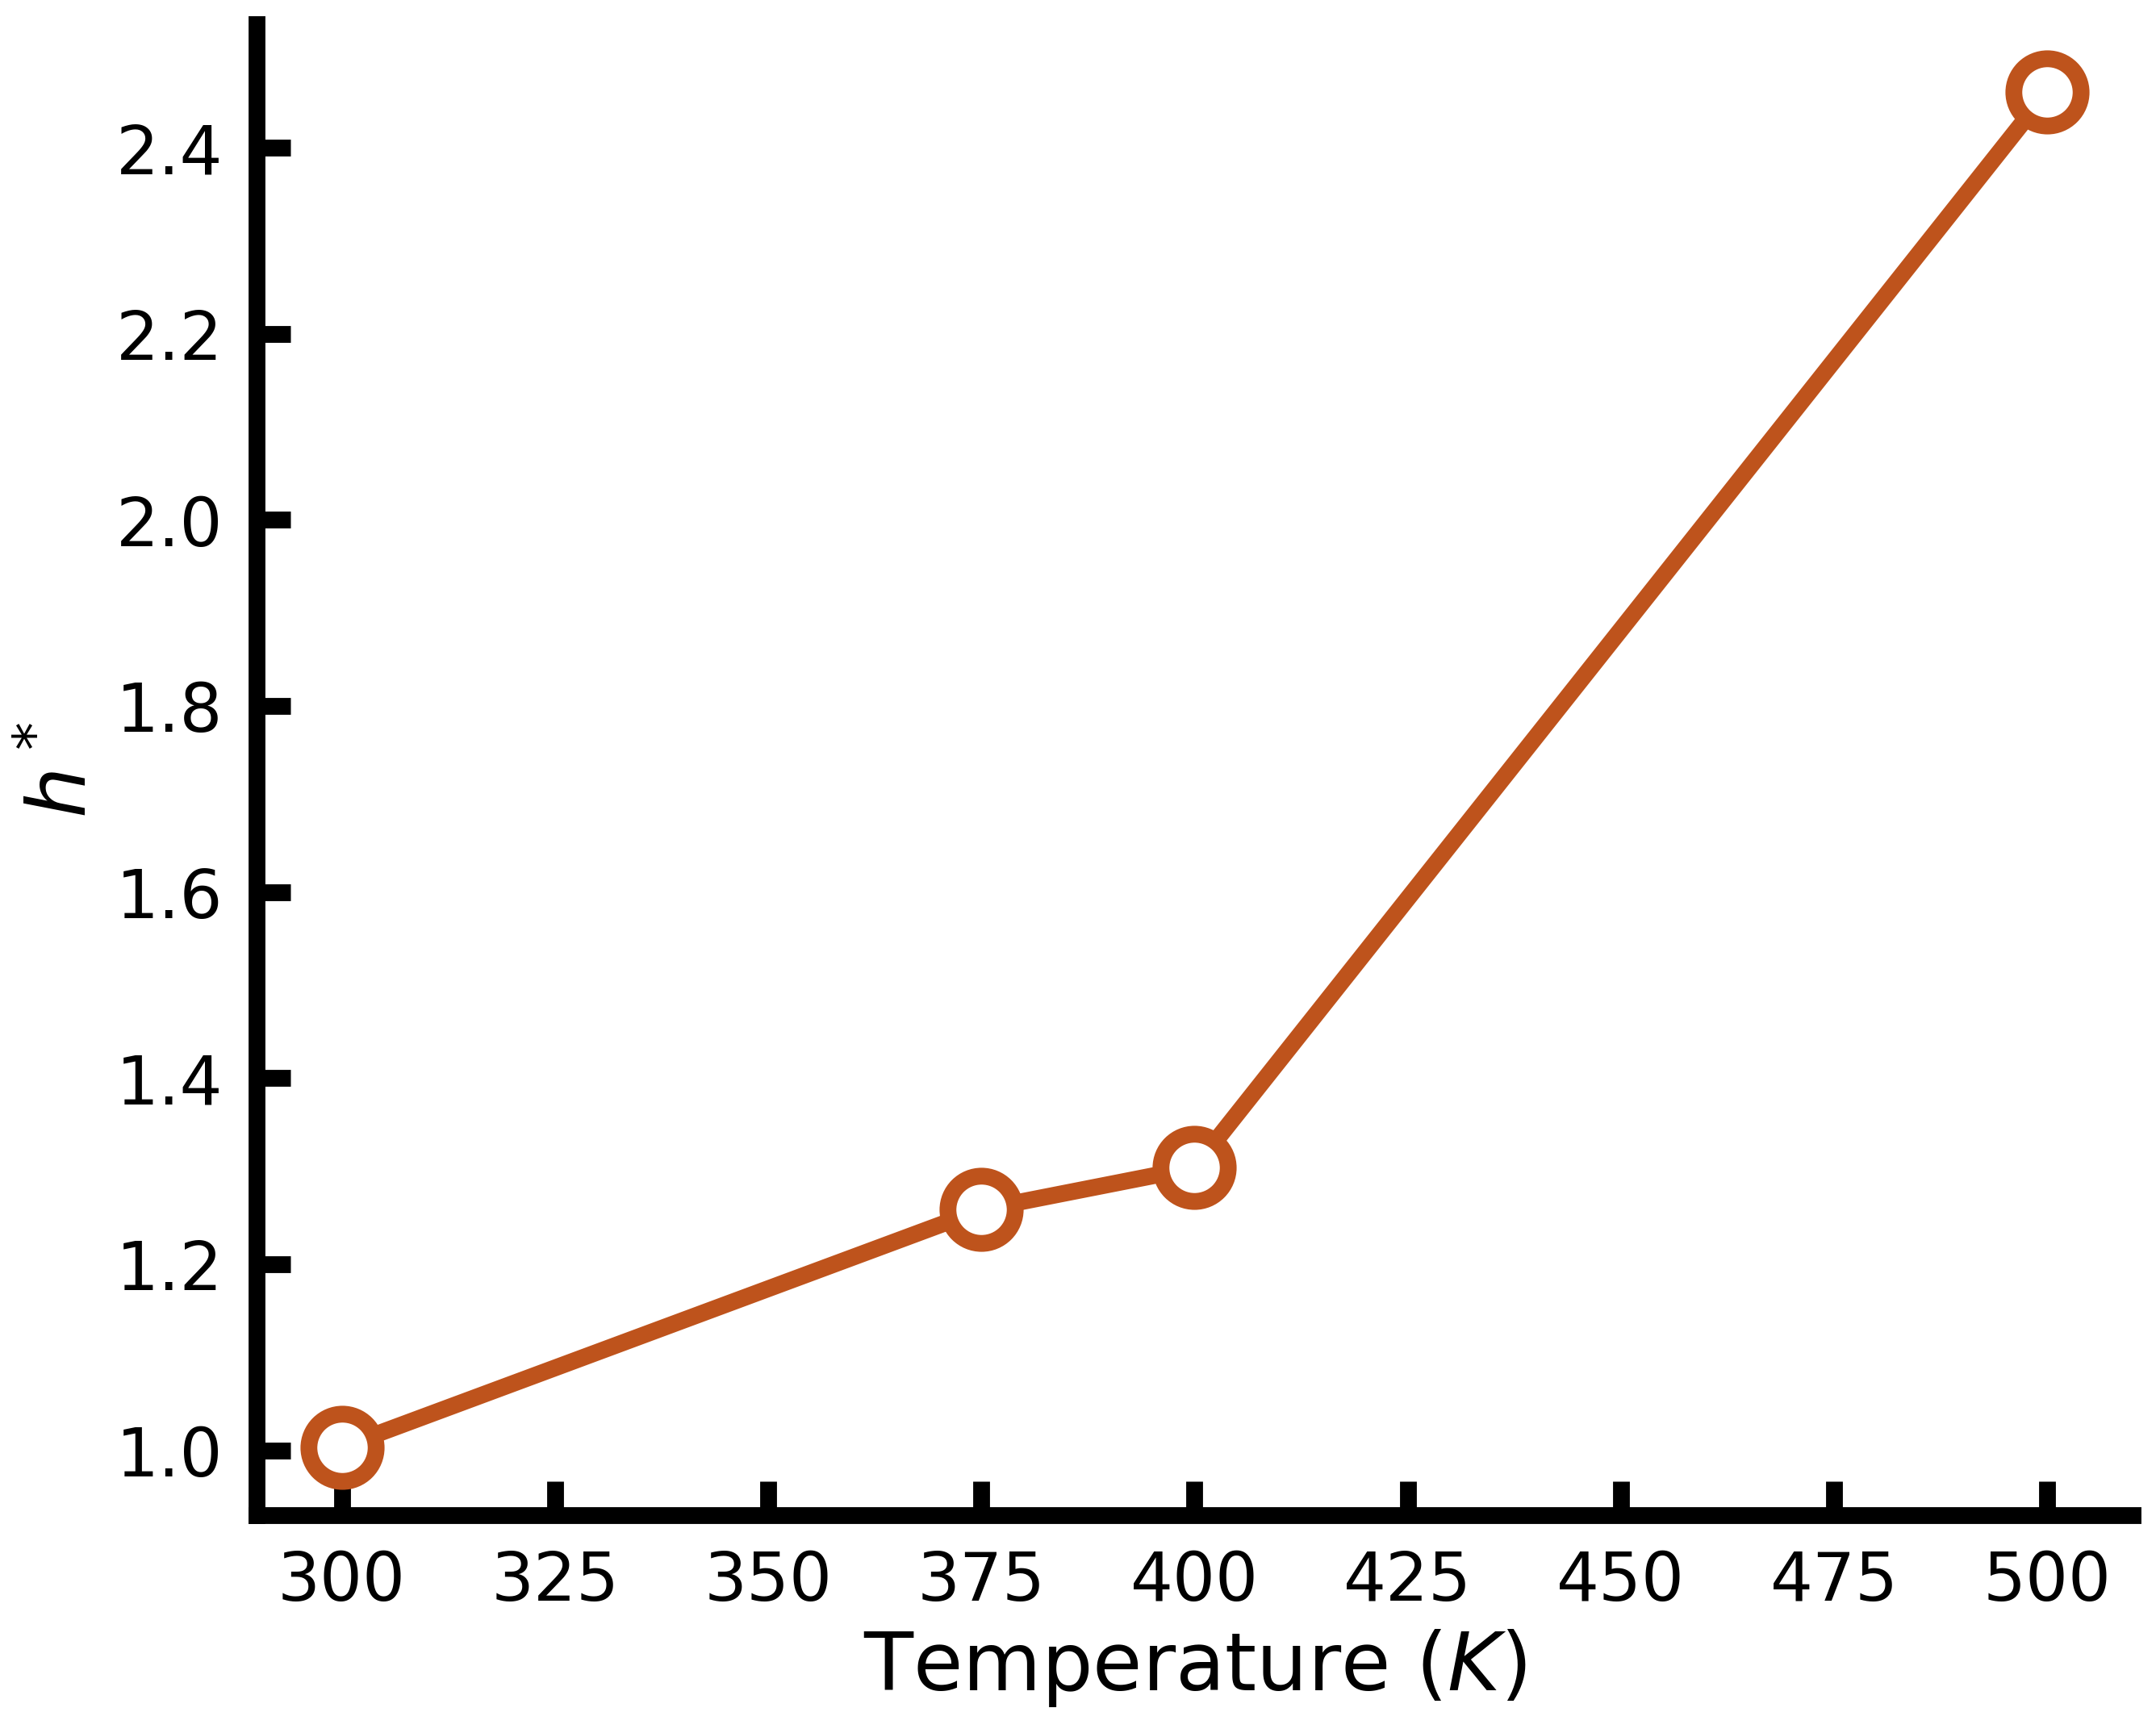

In [6]:
# Cumulative Probabilities

params = {
    "linewidth" : 5,
    "axeswidth" : 5,
    "tick_labelsize" : 20,
    "axes_labelsize" : 24,
    "tick_padding" : 10,
    "markersize" : 20,
}

H_STAR = 3.5

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(params['axeswidth'])
ax.spines['bottom'].set_linewidth(params['axeswidth'])
ax.tick_params(labelsize = params['tick_labelsize'], pad = params['tick_padding'], length = params['axeswidth'] * 2, width = params['axeswidth'], direction = 'in')

ax.set_xlabel(r"Temperature $(K)$", fontsize = params['axes_labelsize'])
ax.set_ylabel(r"$h^*$", fontsize = params['axes_labelsize'])

output = {}

ROOT = "/mnt/CALC_SSD/bgkang/hopping_analysis/trajectories/"
def exponential(x, a, b): return a * np.exp(b * x)
for idx, t in enumerate(["300K", "375K", "400K", "500K"]):
    data = []
    for e in "00", "01", "02", "03":
        data.append(np.genfromtxt(f"{ROOT}/temperature/{t}/ensemble{e}/hop.out")[:,1:])
    data = np.stack(data).flatten()

    hs = np.linspace(0, 5, 1000)
    result = np.array([((data > h).sum() / data.shape[0]) for h in hs])
    delta = result[1:] - result[:-1]

    delta = np.nan_to_num(delta, 0)

    for i in range(200, 999):
        if (np.abs(delta[i]) < 1E-3):
            output[float(t[:-1])] = (hs[i] + hs[i+1]) / 2 
            break

    # ax.plot((hs[1:] + hs[:-1]) / 2, delta, linewidth = params['linewidth'], color = colormap[list(colormap.keys())[idx]], label = t)

print(output)

ax.plot([key for key in output.keys()], [output[key] for key in output.keys()], color = COLORMAP['orange'], linewidth = params['linewidth'], marker = 'o', markersize = params['markersize'], markerfacecolor = '#FFFFFF', markeredgewidth = params['linewidth'], markeredgecolor = COLORMAP['orange'])

plt.savefig("hopping_threshold_temperature.png", dpi = 300, bbox_inches = 'tight')
plt.show()

{0.25: 2.715215215215215, 0.5: 2.78028028028028, 0.75: 2.9404404404404403, 1.0: 3.0005005005005003, 1.5: 2.5, 2.0: 2.17967967967968, 3.0: 1.8543543543543544}


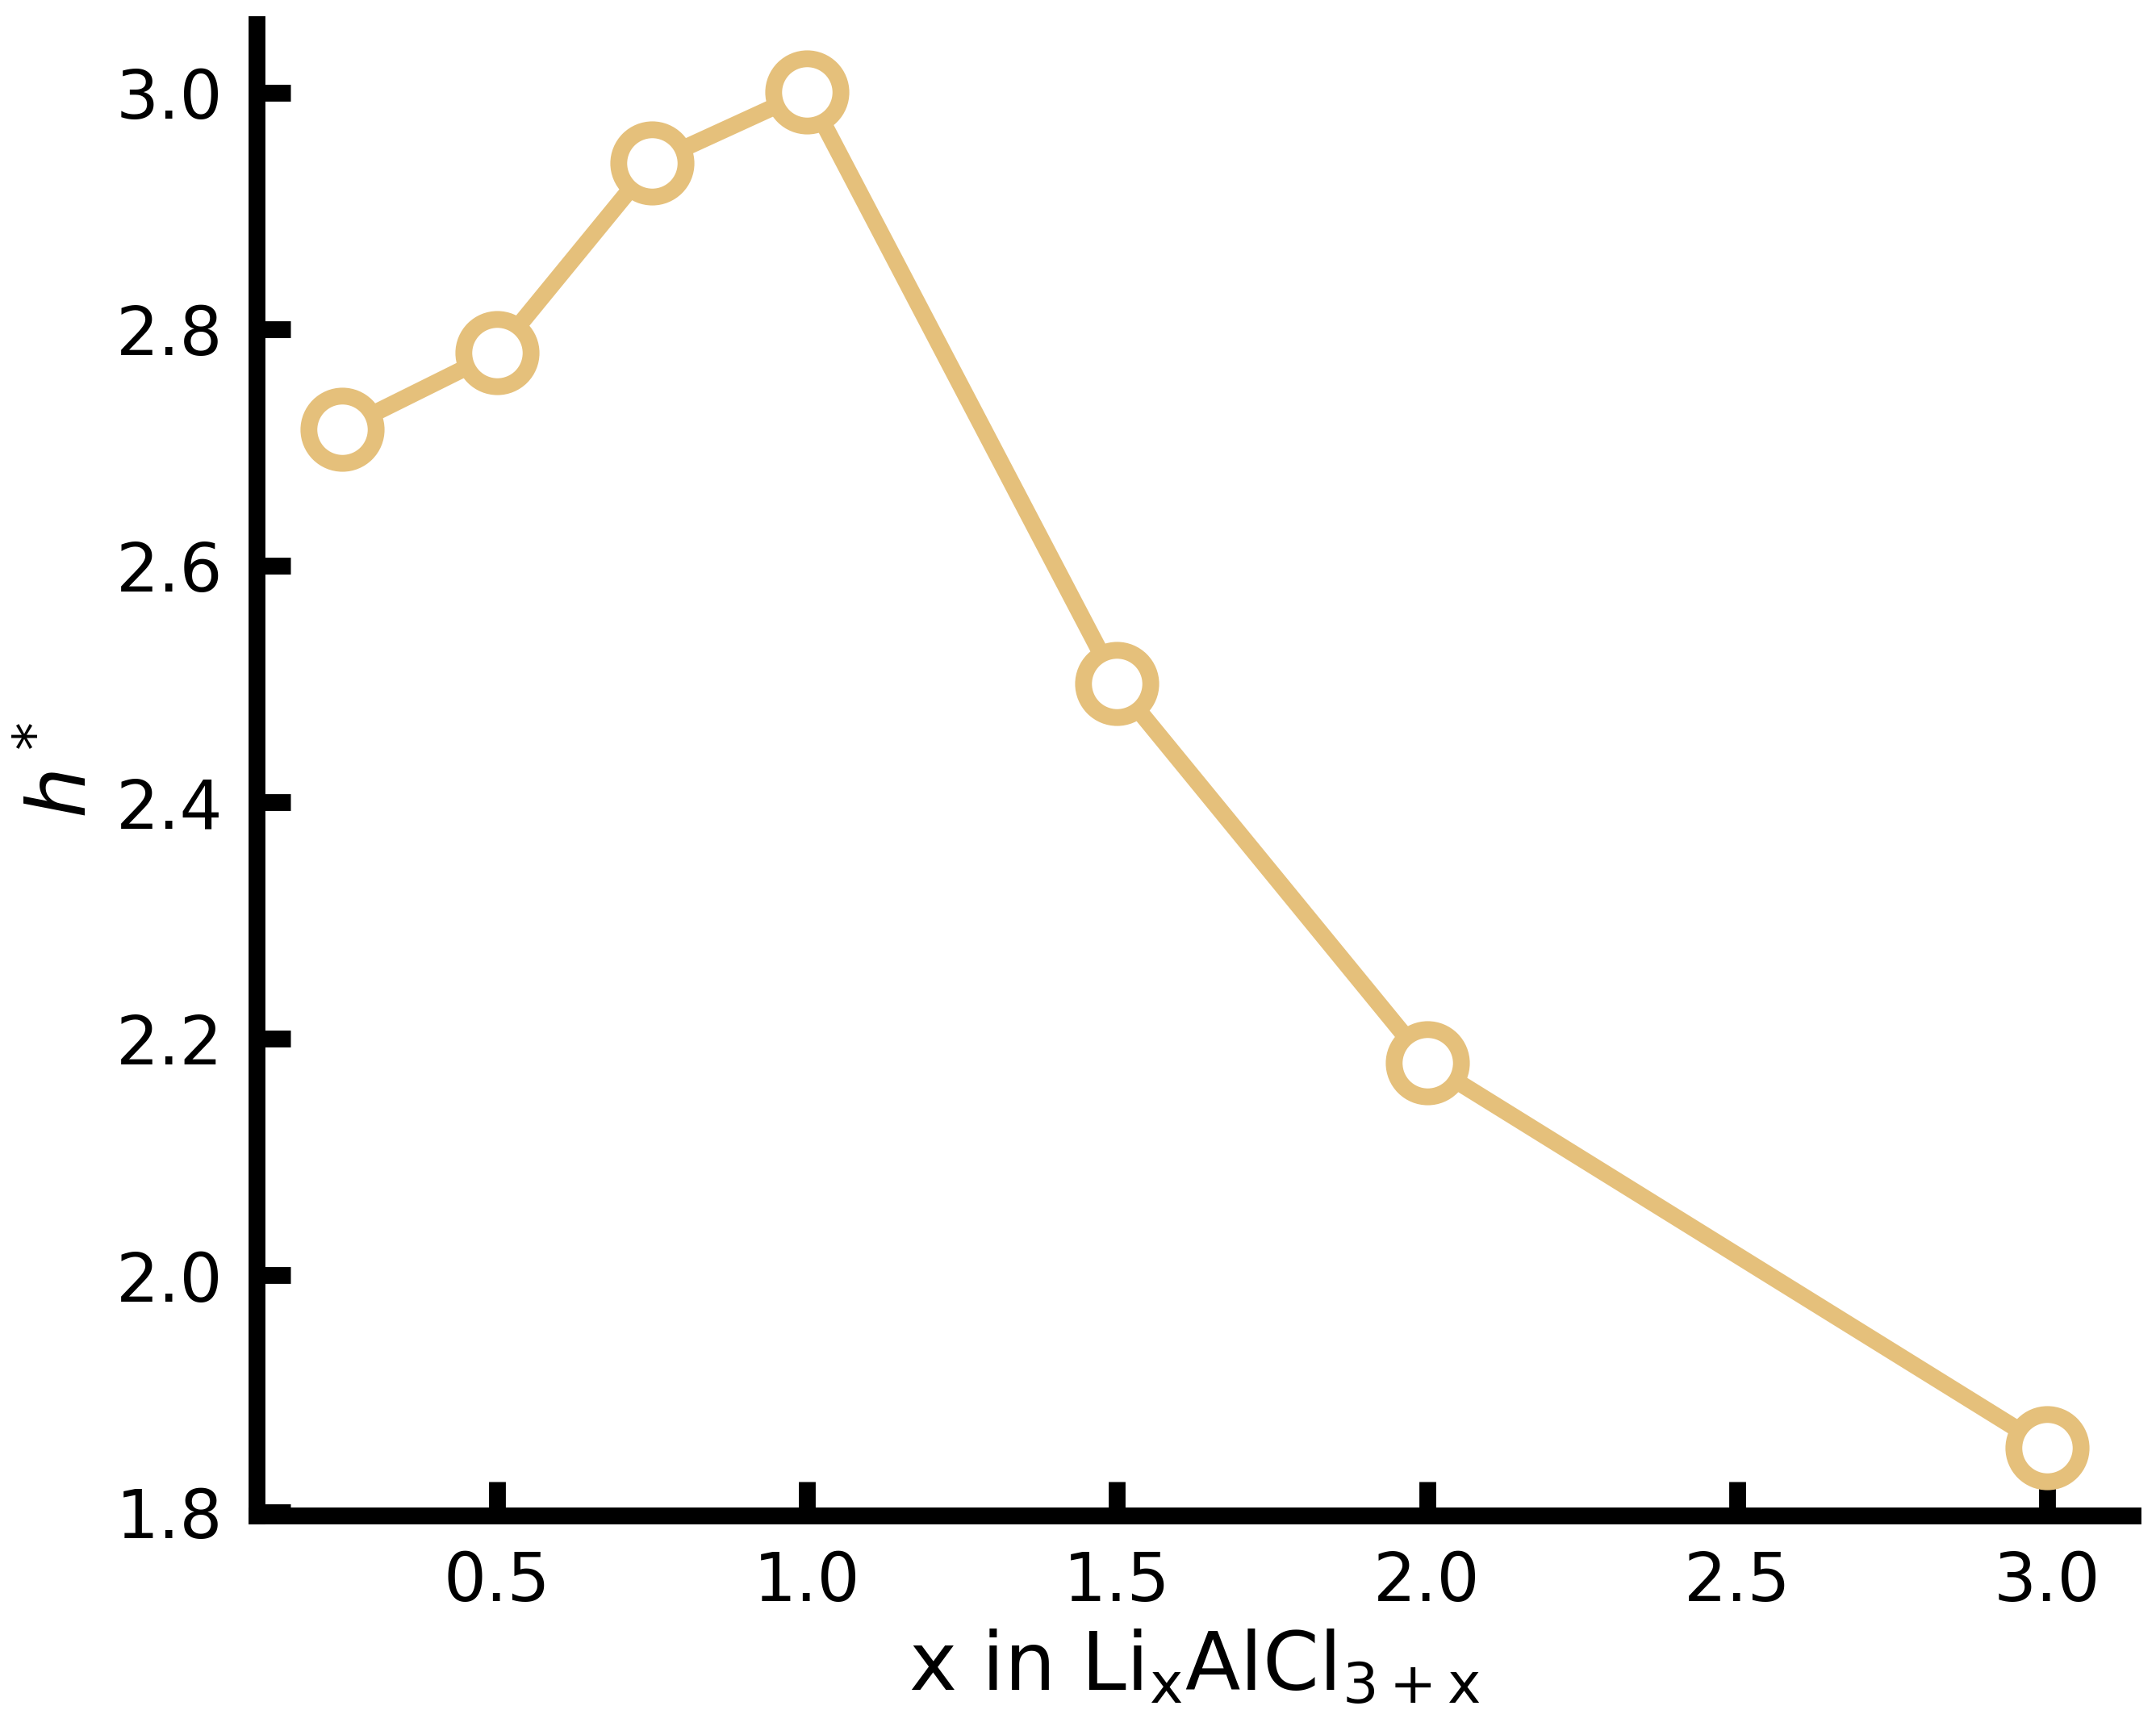

In [16]:
# Cumulative Probabilities

params = {
    "linewidth" : 5,
    "axeswidth" : 5,
    "tick_labelsize" : 20,
    "axes_labelsize" : 24,
    "tick_padding" : 10,
    "markersize" : 20,
}

H_STAR = 3.5

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(params['axeswidth'])
ax.spines['bottom'].set_linewidth(params['axeswidth'])
ax.tick_params(labelsize = params['tick_labelsize'], pad = params['tick_padding'], length = params['axeswidth'] * 2, width = params['axeswidth'], direction = 'in')

ax.set_xlabel(r"x in Li$_{\rm x}$AlCl$_{\rm 3+x}$", fontsize = params['axes_labelsize'])
ax.set_ylabel(r"$h^*$", fontsize = params['axes_labelsize'])

output = {}

ROOT = "/mnt/CALC_SSD/bgkang/hopping_analysis/trajectories/"
def exponential(x, a, b): return a * np.exp(b * x)
for idx, t in enumerate(["Li0.25", "Li0.50", "Li0.75", "Li1.00", "Li1.50", "Li2.00", "Li3.00"]):
    data = []
    for e in "00", "01", "02", "03":
        data.append(np.genfromtxt(f"{ROOT}/composition/{t}/ensemble{e}/hop.out")[:,1:])
    data = np.stack(data).flatten()

    hs = np.linspace(0, 5, 1000)
    result = np.array([((data > h).sum() / data.shape[0]) for h in hs])
    delta = result[1:] - result[:-1]

    delta = np.nan_to_num(delta, 0)

    for i in range(200, 1000):
        if (np.abs(delta[i]) < 1E-4):
            output[float(t[2:])] = (hs[i] + hs[i+1]) / 2 
            break

    # ax.plot((hs[1:] + hs[:-1]) / 2, delta, linewidth = params['linewidth'], color = colormap[list(colormap.keys())[idx]], label = t)

print(output)

ax.plot([key for key in output.keys()], [output[key] for key in output.keys()], color = colormap['yellow'], linewidth = params['linewidth'], marker = 'o', markersize = params['markersize'], markerfacecolor = '#FFFFFF', markeredgewidth = params['linewidth'], markeredgecolor = colormap['yellow'])

plt.savefig("hopping_threshold.png", dpi = 300, bbox_inches = 'tight')
plt.show()